In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [69]:
canva = pd.read_excel('/content/Canva_reviews.xlsx')

In [70]:
canva.shape

(1500, 13)

In [71]:
canva.head()

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality
1,gp:AOqpTOEq6rNIWLnPV4KFTctWvm0mpGEQljtD6mvy1H-...,Soumi Mukhopadhyay,https://play-lh.googleusercontent.com/a-/AOh14...,Hey! Yes I gave a 5 star rating... coz I belie...,5,351,2.116.0,2021-06-17 19:18:28,NaN,NaT,Positive,extremely_happy,NaN
2,gp:AOqpTOE86hSyPRHZgYt28Uk5zGe4FZGb1hkmtFDiYJ2...,Theknown _unknown,https://play-lh.googleusercontent.com/a-/AOh14...,Canva used to be a good app! But recently I've...,1,160,2.116.0,2021-06-23 19:13:28,Hi there. We're sorry to hear that you are hav...,2021-06-26 20:20:56,Negative,saving_downloading_issue,bug_saving_files
3,gp:AOqpTOHSuKkVTcM3QgCCKysHQlxEnk2ocOKsUMiMIJy...,Anthony Dean,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's a brilliant app, but I have just one prob...",5,145,2.116.0,2021-06-19 23:36:07,NaN,NaT,Negative,others,bug_app_crash
4,gp:AOqpTOEOrZt5H6jXPiplJyffCd5ZBnVXACTWgwNsF1R...,Neha Diana Wesley,https://play-lh.googleusercontent.com/a-/AOh14...,This was such a great app. I used to make BTS ...,4,142,2.116.0,2021-06-21 00:29:27,Hi Neha. Sorry to hear that you are unable to ...,2021-06-24 20:46:28,Negative,others,bug_other


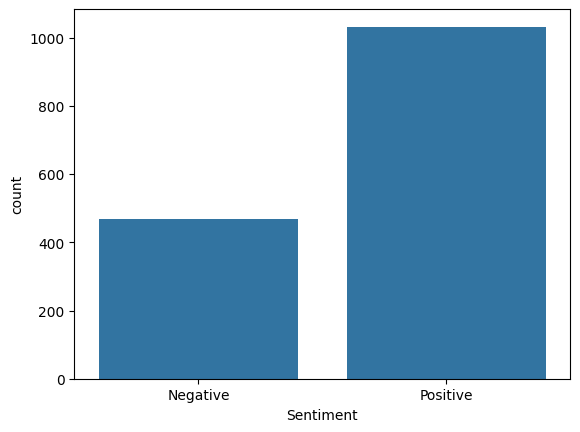

In [72]:
### lets look into the sentiments
sns.countplot(x='Sentiment',data= canva)
plt.show()

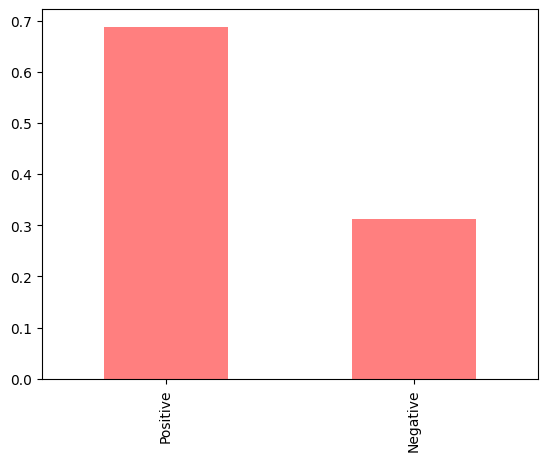

In [73]:
canva.Sentiment.value_counts(normalize= True).plot(kind='bar',alpha = 0.5,color ='red')
plt.show()

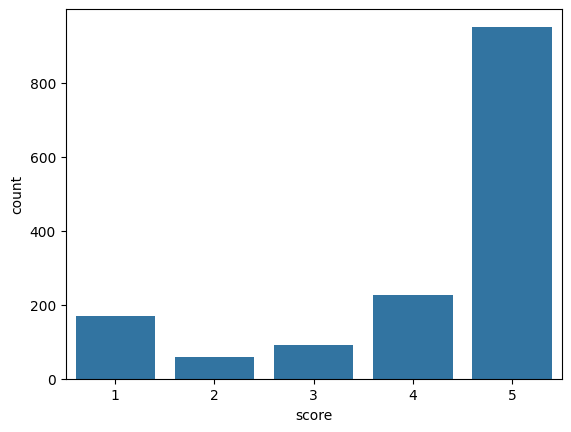

In [74]:
# lets look into scores/ratings......
sns.countplot(x='score',data=canva)
plt.show()

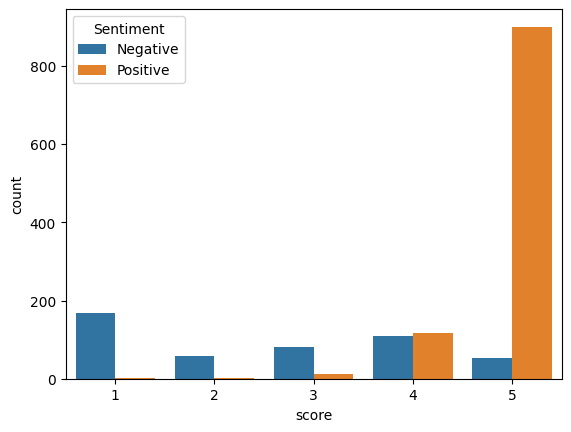

In [75]:
# lets try to relate the rating with the sentiment
sns.countplot(x='score',data= canva,hue ='Sentiment')
plt.show()

### NLP Pipeline
* Data acquistion : through webscraping,inside the compant(warehouse/databases/datalakes),apis, external sources and generate synthetic data.

* Text processing / Cleaning : HTMl tag removel ,special character removel, converting into lowercase, stopwords , spelling check
, Tokenization  etc.

* Advanced processing : Stemming  / Lemmatization , Pos Tagging, NER (Name entity recognition) , Parsing , n-grams too.

* Feature Engineering / Extraction : n -grams , one hot encoding (Bag of words) , Tf IDf and Word2Vector.

* Modeling and Evaulation :



In [76]:
# Lets clean the data
# lets generate the length of the text and word_len
canva['text_len'] = canva.review.apply(len)

# let generate the word_len
canva['word_len'] = canva.review.apply(lambda x: len(str(x).split()))

In [77]:
canva.text_len.describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: text_len, dtype: float64

In [78]:
canva.word_len.describe()

count    1500.000000
mean       16.266667
std        10.851085
min         3.000000
25%        10.000000
50%        14.000000
75%        19.000000
max        98.000000
Name: word_len, dtype: float64

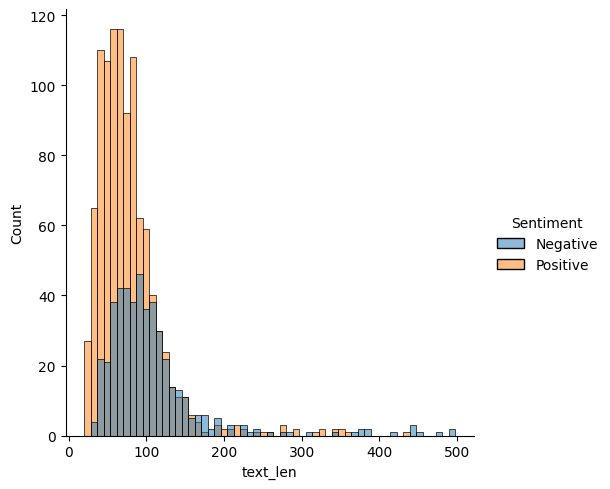

In [79]:
sns.displot(x='text_len',hue = 'Sentiment',data= canva)
plt.show()

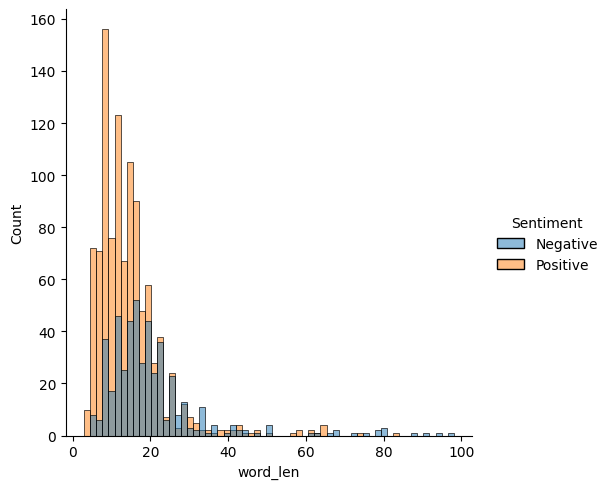

In [82]:
sns.displot(x='word_len',hue = 'Sentiment',data= canva)
plt.show()

In [83]:
canva.loc[canva.word_len==98,'review']

9    When I started trial everything works pretty w...
Name: review, dtype: object

In [84]:
sentence =canva.loc[9,'review']
sentence

'When I started trial everything works pretty well and so I decided to purchased every month and guess what! Every video I edited and saved was never been save at all even if how many times I tried, it was said was saved but when I check on my files it was not there, never been seen, and all pictures and caption is so blurred! And so I need to screenshoot and crop after so that I can use my edited design! What happen canva? So waste of moneyyyy!!!!!! I hope you can do solve this problem! Please'

In [85]:
import nltk
from nltk.tokenize import RegexpTokenizer,word_tokenize
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
# here it token but not clean the text
[word_tokenize(sentence)]

[['When',
  'I',
  'started',
  'trial',
  'everything',
  'works',
  'pretty',
  'well',
  'and',
  'so',
  'I',
  'decided',
  'to',
  'purchased',
  'every',
  'month',
  'and',
  'guess',
  'what',
  '!',
  'Every',
  'video',
  'I',
  'edited',
  'and',
  'saved',
  'was',
  'never',
  'been',
  'save',
  'at',
  'all',
  'even',
  'if',
  'how',
  'many',
  'times',
  'I',
  'tried',
  ',',
  'it',
  'was',
  'said',
  'was',
  'saved',
  'but',
  'when',
  'I',
  'check',
  'on',
  'my',
  'files',
  'it',
  'was',
  'not',
  'there',
  ',',
  'never',
  'been',
  'seen',
  ',',
  'and',
  'all',
  'pictures',
  'and',
  'caption',
  'is',
  'so',
  'blurred',
  '!',
  'And',
  'so',
  'I',
  'need',
  'to',
  'screenshoot',
  'and',
  'crop',
  'after',
  'so',
  'that',
  'I',
  'can',
  'use',
  'my',
  'edited',
  'design',
  '!',
  'What',
  'happen',
  'canva',
  '?',
  'So',
  'waste',
  'of',
  'moneyyyy',
  '!',
  '!',
  '!',
  '!',
  '!',
  '!',
  'I',
  'hope',
  'you

In [88]:
# token and clean the text
regex = RegexpTokenizer('[a-zA-Z0-9]+')

In [89]:
tokenized = regex.tokenize(sentence)

In [90]:
list_random = ['moneyyy','ooohhh','ah']

In [91]:
## stemming
from nltk.stem import PorterStemmer , SnowballStemmer , LancasterStemmer

In [92]:
porter = PorterStemmer()
snow = SnowballStemmer(language = 'english',ignore_stopwords = True)
lancaster = LancasterStemmer()

In [93]:
# list for stemming
stemming_list = ['Running','Cries','Leaving','Playing','Fasting','Having']
stemmed_porter = [porter.stem(word) for word in stemming_list]
print('Porter:',stemmed_porter)

stemmed_snow = [snow.stem(word) for word in stemming_list]
print('Snowball:',stemmed_snow)

stemmed_lnc =[lancaster.stem(word) for word in stemming_list]
print('Lancaster:',stemmed_lnc)

Porter: ['run', 'cri', 'leav', 'play', 'fast', 'have']
Snowball: ['run', 'cri', 'leav', 'play', 'fast', 'having']
Lancaster: ['run', 'cri', 'leav', 'play', 'fast', 'hav']


In [ ]:
# porter is very fast in term of processing
# snow is best it give accuracy and porcess slowly  ***
#
# lancaster it better works in hyphen case ( taking-breath)

In [94]:
list_random = ['moneyyyy','ooohhh','ah']
[snow.stem(word) for word in list_random]

['moneyyyi', 'ooohhh', 'ah']

In [95]:
# custom mapping and cleaning
corpus = {'moneyyyy':'money','ooohhh':'oh','ah':'ok'}

def mapping(text):
  if text in corpus:
    return (corpus[text])
  else:
    return()

In [96]:
[mapping(word) for word in list_random]

['money', 'oh', 'ok']

In [106]:
def clean_text(text):
  # remove the hyperlinks and special charectors
  text = re.sub('(www.+)|(https:.?)|(@[a-zA-Z])|(\W+)|(\s+)'," ",text)
  text = re.sub('[^a-zA-Z0-9]'," ", text)
  text = re.sub('\w+:/\S+'," ",text)  # select the weblink and remove it
  text = re.sub('\s'," ",text).strip() # remove extra white spaces
  text = re.sub('\d+'," ",text) # Remove Digits
  return(text)
canva['review_clean'] = canva.review.apply(clean_text)


In [107]:
import string
noise = string.punctuation
noise+=" "

#canva['review_clean'] = [word for word in canva.review_clean if word not in noise ]

In [109]:
# Tokenize
from nltk.tokenize import word_tokenize
words = [word_tokenize(word) for word in canva.review_clean]

# stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

all_token = [token for review_clean in words for token in review_clean if token.lower() not in stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


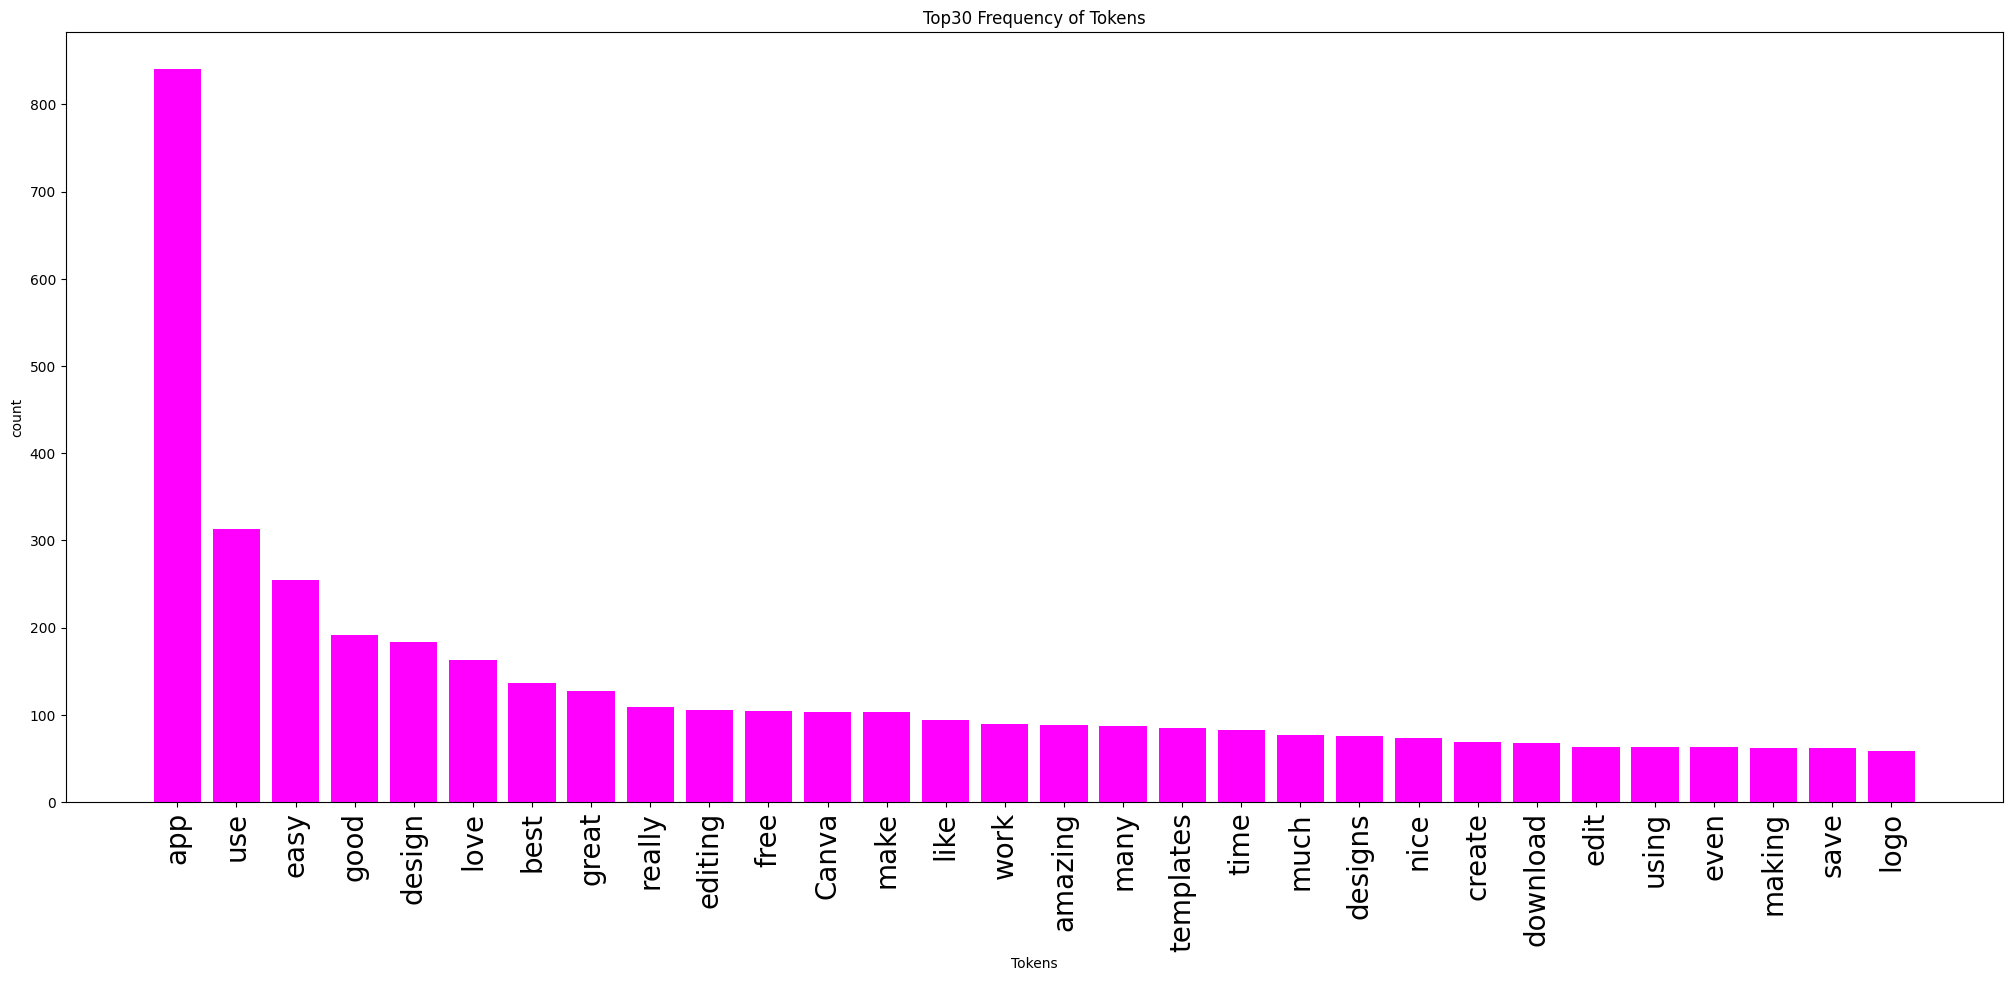

In [113]:
from nltk.probability import FreqDist
df = pd.DataFrame(FreqDist(all_token).items(),columns =['Tokens','Freq']).sort_values(ascending= False, by = 'Freq')

# plot the top 30 tokens
plt.figure(figsize=(25,10))
plt.bar(df['Tokens'][:30],df['Freq'][:30],color = 'magenta')
plt.xlabel('Tokens')
plt.ylabel('count')
plt.xticks(size = 20,rotation = 90)
plt.title('Top30 Frequency of Tokens')
plt.show()

In [100]:
# word Cloud
from wordcloud import WordCloud

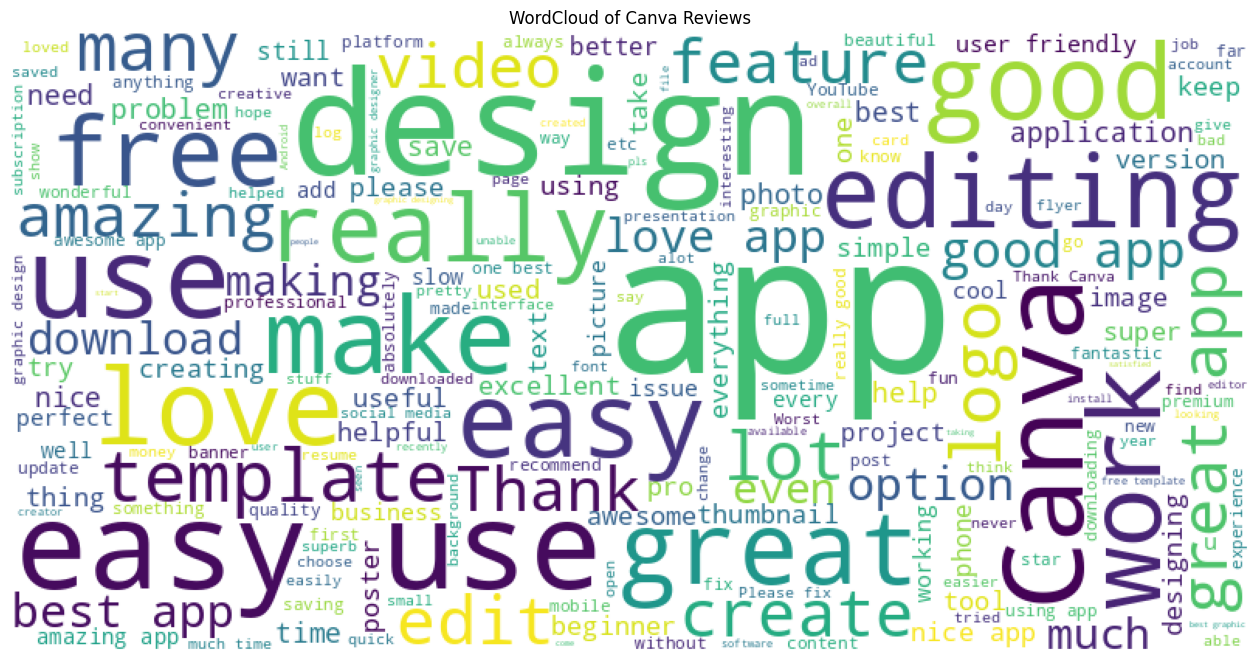

In [115]:
# generate the WordCloud
#
from wordcloud import WordCloud

# generate the wordcloud Image
plt.figure(figsize=(16,10))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_token))

plt.imshow(wordcloud)

plt.title('WordCloud of Canva Reviews')
plt.axis('off')
plt.show()


In [ ]:
# worldcloud is visvualise the NLP

#### Modeling Code

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(binary= True,min_df = 5,stop_words='english')
vec = vector.fit_transform(canva['review_clean']).todense()

print(vec.shape)

feature_names = vector.get_feature_names_out()

# Bag of Words Structure
pd.DataFrame(vec,columns= feature_names)


## convert the matrix into an array
array = np.asarray(vec)

(1500, 392)


In [118]:
from operator import imod
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()

xtrain,xtest,ytrain,ytest = train_test_split(array,canva.Sentiment,test_size = 0.20,random_state = 42)

pred = logreg.fit(xtrain,ytrain).predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

    Negative       0.85      0.80      0.82        84
    Positive       0.92      0.94      0.93       216

    accuracy                           0.90       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.90      0.90      0.90       300

